# Capstone Project - Car accident severity (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Result](#result)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Inroduction <a name="introduction"></a>
For this Caston Project which come under my IBM certification course, I would like to perform the Data Analysis of **Road accident data** with purpose of checking corelation of Road Accident at different conditions of **Road**, **Weather** and **Light**. 

Generally road accidents are creating sevier injuries to people, vehicles or both, To avoid and reduce the frequency of these type of accidents, I would like to build a model to predict the severity of an accident given the **Weather** and the **Road** conditions. This way we would be able to bring awareness about the possibility and sevierty of an accident. This way people will drive with full of attention or will change the drive plan. The main purpose of algorythm will be to know the severity of accident at given Weather and Road condition.

## Data <a name="data"></a>

The data was collected by the Seattle Police Department, recorded by Traffic Records and provided by Coursera via a download link. The time period for this data starts from 2004 and consist 194,673 observations and 38 variables.
As mentioned in Introduction part, we will use **SEVERITYCODE** as our dependent variable Y and try different combinations of independent variables X to see the impact of Inependent Variable on dependent one.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
df = pd.read_csv('C:/Users/SRA3JA/Desktop/Applied Data Science capston/Week 2 Assignment/Data-Collisions.csv')
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [35]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [22]:
df.describe(include="all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


### Lets Check the missing value

In [4]:
df.isna().sum().to_frame().rename(columns={0: 'NaN Count'})

,NaN Count
SEVERITYCODE,0
X,5334
Y,5334
OBJECTID,0
INCKEY,0
COLDETKEY,0
REPORTNO,0
STATUS,0
ADDRTYPE,1926
INTKEY,129603


As you can see above some of the variables are having lots of missing value. As first outlook, I will be considering below variables as an independent variables X:
* COLLISIONTYPE: Collision type
* WEATHER: Weather conditions during the time of the collision.
* ROADCOND: The condition of the road during the collision.
* LIGHTCOND: The light conditions during the collision.
* UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol

Text(0.5, 1.0, 'The total number of car accidents during different Weather condition')

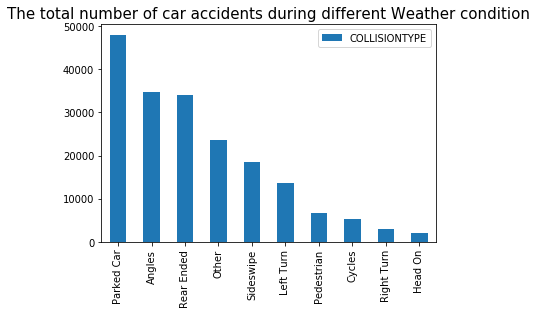

In [25]:
df_Weather = df['COLLISIONTYPE'].value_counts().to_frame()
df_Weather.plot(kind='bar')
plt.title("Collision type for total number of car accidents",fontsize= 15)

### Inference
Maximum accident has happened during parked conditions

Text(0.5, 1.0, 'The total number of car accidents during different Weather condition')

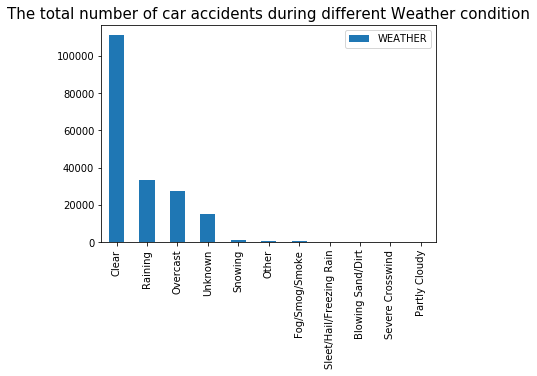

In [28]:
df_Weather = df['WEATHER'].value_counts().to_frame()
df_Weather.plot(kind='bar')
plt.title("The total number of car accidents during different Weather condition",fontsize= 15)

### Inference
Maximum accident has happened during clear weather conditions

Text(0.5, 1.0, 'The total number of car accidents during different Road condition')

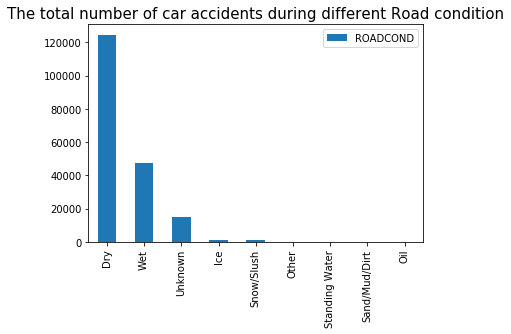

In [29]:
df_Roadcond = df['ROADCOND'].value_counts().to_frame()
df_Roadcond.plot(kind='bar')
plt.title("The total number of car accidents during different Road condition",fontsize= 15)

### Inference
Maximum accident has happened during Dry Road conditions

Text(0.5, 1.0, 'The total number of car accidents during different Light condition')

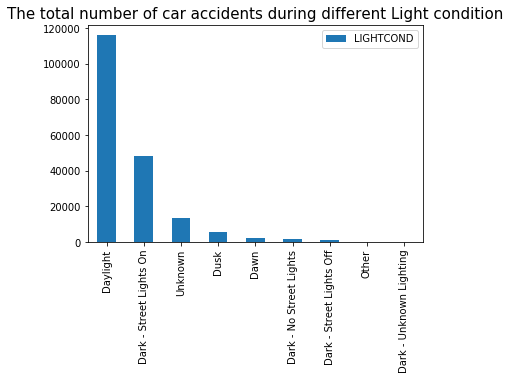

In [31]:
df_Roadcond = df['LIGHTCOND'].value_counts().to_frame()
df_Roadcond.plot(kind='bar')
plt.title("The total number of car accidents during different Light condition",fontsize= 15)

### Inference
Maximum accident has happened during Day light conditions

df_Lightcond = df['UNDERINFL'].value_counts().to_frame()
df_Lightcond.plot(kind='bar')
plt.title("Whether or not a driver involved was under the influence of drugs or alcohol",fontsize= 15)

### Inference
Most of the time driver is not under the influence of drugs or alcohol

## Methodology <a name="methodology"></a>

* Step1: Data preparation and cleaning
* Step2: Converting the Categorical variables in Numeric Value
* Step3: Normalize Data
* Step4: Split the Data set in to Train and Test set
* Step5: Classification Modeling and Evaluation

## Analysis <a name="analysis"></a>

### Step1: Data preparation and cleaning
In this step we will select only the relevant fields by dropping the irrelevant data which are having lots of missing value.

In [37]:
df_sub = df[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'SEVERITYCODE']]
df_sub = df_sub.dropna()
df_sub.head()

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SEVERITYCODE
0,Angles,Overcast,Wet,Daylight,N,2
1,Sideswipe,Raining,Wet,Dark - Street Lights On,0,1
2,Parked Car,Overcast,Dry,Daylight,0,1
3,Other,Clear,Dry,Daylight,N,1
4,Angles,Raining,Wet,Daylight,0,2


In [38]:
df_sub.dtypes

COLLISIONTYPE    object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
UNDERINFL        object
SEVERITYCODE      int64
dtype: object

### Step2: Converting the Categorical variables in Numaric Value
In this steps we will convert all categorical variables in to Numeric one, and coverting them to feature so they will act as independent variable. Severity code will behave like dependet variable.

In [39]:
df_sub['UNDERINFL'].replace(to_replace=['N','Y','0'], value=[0,1,0],inplace=True)
df_sub['UNDERINFL'].value_counts()

0    180219
1      9097
Name: UNDERINFL, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder

features = df_sub[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL']]

for feature in ['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']:
    features[feature] = features[feature].astype('|S') 
    features[feature] = LabelEncoder().fit_transform(features[feature])

features.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,0,4,8,5,0
1,9,6,8,2,0
2,5,4,0,5,0
3,4,1,0,5,0
4,0,6,8,5,0


In [41]:
X = features
y = df_sub['SEVERITYCODE'].values

### Step3: Normalize Data

In [48]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.61715866,  0.32150987,  1.47904464,  0.3500893 , -0.22467193],
       [ 1.61435927,  1.02230214,  1.47904464, -1.40093682, -0.22467193],
       [ 0.17812908,  0.32150987, -0.71198344,  0.3500893 , -0.22467193],
       [-0.18092847, -0.72967854, -0.71198344,  0.3500893 , -0.22467193],
       [-1.61715866,  1.02230214,  1.47904464,  0.3500893 , -0.22467193]])

### Step4: Split the Data set in to Train and Test set
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151452, 5) (151452,)
Test set: (37864, 5) (37864,)


### Step5: Classification Modeling and Evaluation
### Modeling
### K nearest neighbor (KNN) : 
KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.

In [51]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [64]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.68854321, 0.73344074, 0.65891084, 0.72493662, 0.70523452,
       0.72778893, 0.71196915, 0.72139763, 0.71162582])

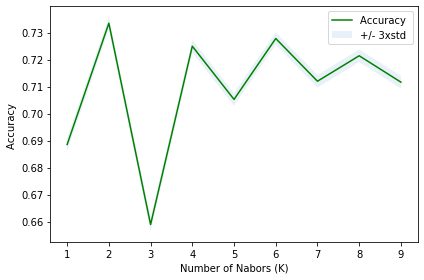

In [65]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [66]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7334407352630467 with k= 2


In [67]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

### Logistic Regression : 

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Decision Tree : 

In [55]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model_tree.fit(X_train, y_train)
model_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Evaluation

In [ ]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

### K nearest neighbor (KNN) : 

In [69]:
yhat = neigh.predict(X_test)
yhat_knn = yhat
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_knn = f1_score(y_test, yhat, average='weighted')
precision_knn = precision_score(y_test, yhat, average='weighted')
knn_report = ['KNN', round(jaccard,2), round(f1_score_knn,2), round(precision_knn,2)]

Train set Accuracy:  0.7381282518553733
Test set Accuracy:  0.7334407352630467


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


### Logistic Regression : 

In [57]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhat_lr = yhat
print("Train set Logistic regression Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Logistic regression Accuracy: ", metrics.accuracy_score(y_test, yhat))
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_lr = f1_score(y_test, yhat, average='weighted')
precision_lr = precision_score(y_test, yhat, average='weighted')
lr_report = ['Logistic Regression', round(jaccard,2), round(f1_score_lr,2), round(precision_lr,2)]

Train set Logistic regression Accuracy:  0.6984919314370229
Test set Logistic regression Accuracy:  0.6964398901331079


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


### Decision Tree : 

In [59]:
yhat = model_tree.predict(X_test)
yhat_tree = yhat
print("Train set Decission Tree Accuracy: ", metrics.accuracy_score(y_train, model_tree.predict(X_train)))
print("Test set Decission Tree Accuracy: ", metrics.accuracy_score(y_test, yhat))
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_tree = f1_score(y_test, yhat, average='weighted')
precision_tree = precision_score(y_test, yhat, average='weighted')
tree_report = ['Decision Tree', round(jaccard,2), round(f1_score_tree,2), round(precision_tree,2)]

Train set Decission Tree Accuracy:  0.74807859916013
Test set Decission Tree Accuracy:  0.7479135854637651


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


## Result <a name="result"></a>

In [60]:
report = pd.DataFrame(data=np.array([knn_report,lr_report, tree_report]), 
                      columns=['Algorithm', 'Jaccard', 'F1-score', 'Precision'])
report

,Algorithm,Jaccard,F1-score,Precision
0,KNN,0.72,0.7,0.7
1,Logistic Regression,0.7,0.58,0.63
2,Decision Tree,0.75,0.69,0.78


The best modal is Decision Treee as having highest Jacard score

In [61]:
from sklearn.metrics import confusion_matrix

print('KNN Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_knn).ravel()
(tn, fp, fn, tp)

KNN Confusion Matrix


(23882, 2513, 7902, 3567)

In [62]:
print('Decision Tree Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_tree).ravel()
(tn, fp, fn, tp)

Decision Tree Confusion Matrix


(26025, 370, 9175, 2294)

In [63]:
print('Logistic Regression Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_lr).ravel()
(tn, fp, fn, tp)

Logistic Regression Confusion Matrix


(26238, 157, 11337, 132)

## Discussion <a name="discussion"></a>

When we started analysisng the data, we had some categorical data with data type 'object'. This categorical data we can not feed to algorithm so we converted this data in to variable and later we tried 3 different algorithm to check which gives us better result. During KNN classification we also checked whcih K value gives us best result to improve the accuracy of modal.
Evaluation metrics used to test the accuracy of our models were Jaccard index, f-1 score and precision score. 

## Conclusion <a name="conclusion"></a>

In this excercise we evaluated 3 machine learning algorithms to predict the severity of an accident knowing the weather and road conditions. The three models performed very similary, but Decision Tree stood out after comparision of model's accuracy.